## Introduction

In the digital age, the proliferation of new information dissemination technologies has revolutionized how we consume news. However, this evolution has also facilitated the spread of fake news, posing significant threats to various sectors, including political environments and racial communities causing disharmony in our communities.

With news being disseminated by various different news outlets alll over the world, it is getting harder to determine which news are real and which are fake news trying to sway the public opinion. As such looking into text classification to determine whether the news article is real or fake could be very useful in order for accurate information to be distributed correctly while filtering out the fake news.

## Domain specific area
The area of focus is global news, particularly in the context of ongoing conflicts such as those between Palestine and Israel, and Russia and Ukraine. These conflicts have highlighted the importance of information control and the role of global news in garnering support for each side. Misinformation and fake news in these contexts can influence international perception and diplomatic relations [1] [2] (Fridman & Kenner, 2021; Daraghmi & Yuan, 2020).

In the political environment, fake news can manipulate public opinion and impact international relation. For example, during the Russia-Ukraine conflict, both sides have used misinformation to shape narratives and influence global perspectives [1] (Fridman & Kenner, 2021).

Within our community, misinformation can exacerbate ethnic and racial tensions, potentially leading to violence and unrest. In the context of the Israel-Palestine conflict, misinformation campaigns have intensified already existing tensions and have led to increased violence [2] (Daraghmi & Yuan, 2020).

## Objective

The objective of this project is to explore both a statistical model, K-nearest neighbour algorithm and a embedding-based model, Long Short-Term Memory (LSTM) model and to explore both models and look into each of their effectiveness and applications in each domain.

In the project, I would evaluate the performances of both models, examining their effectiveness and performance in classifying and detecting fake news after training and conduct comparative analysis on the different models based on accuracy on detecting fake news.

The project aims to help out by contributing to the ongoing challenge of fake news detection by providing an comprehensive analysis of both the k-NN model and the LSTM model being a representative of the statistical model and embedding model respectively, giving an insight into guiding of researchers into a selection of models based on their data and resources and also help out the general public by giving them informed information by verifying the news before the dissemination of information and news.

## Dataset

The dataset that I have chosen is a dataset found on Kaggle called the WELFake dataset. The dataset contains 72,134 articles collated from four popular news dataset, Kaggle, McIntire, Reuters and BuzzFeed Political with 25,028 real news articles and 37,106 fake news articles. There is 4 columns in the dataset, namely the Index, the Title, the text and the label which identifies which news are real and which are fake by allocating the real news article with a number 1 and fake news with a number 0.

## Evaluation Methodology

For evaluating the different models, I will looking at the Accuracy, Precision, Recall and F1 score metrics to evaluate the two model's performance.

When looking at the accuracy, I would be able to compare which of the two models are more accurate when they are put to the test detecting the fake news and real news as it provides a measure of the model's performane by showing the proportion of correctly classified instances.

When looking at  precision, I will be able to read the proportion of true positives out of all the positive predictions, with a high precision it indicates a low false positive which is better in minimizing false information.

When looking at recall, I will be able to read the proportion of true positive predictions out of all actual positives, with a high recall, it indicates a low false negative which means that real news are not being classified as fake news.

F1-score metrics provides a metric which is a harmonic mean between precision and recall and helps with the training and false news deetection as it considerse both false positives and false negatives




## Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
fake_df=pd.read_csv('Fake.csv')[['text']]
true_df=pd.read_csv('True.csv')[['text']]

fake_df['target'] = 0
true_df['target'] = 1

df = pd.concat([fake_df, true_df]).sample(frac=1).reset_index(drop=True)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   target  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [4]:
df = df.drop_duplicates()

In [5]:
# data preprocessing for k-Nearest Neighbour

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import re

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# text cleaning

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(" reuters ","",text)
    text = re.sub("  "," ",text)

    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [7]:
# Tfidf vectorization
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
X = tfidf_vectorizer .fit_transform(df['cleaned_text']).toarray()
y = df['target'].values

In [8]:
# data splitting

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =30)

## Baseline model

For the baseline model I have decided to use the naive bayes model from sklearn as a baseline text classification model due to its simplicity and speed. With its simplicity we can use it as a baseline for comparison against the kNN model and the LSTM model.



In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# the preprocessed data that I will use will be the same one as the data for k-Nearest Neighbor

#Initialise Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train,y_train)

y_pred = nb_classifier.predict(X_test)

baseline_accuracy = accuracy_score(y_test,y_pred)
baseline_precision = precision_score(y_test,y_pred)
baseline_recall = recall_score(y_test,y_pred)
baseline_f1 = f1_score(y_test,y_pred)

print(f"Accuracy: {baseline_accuracy:.2f}")
print(f"Precision: {baseline_precision:.2f}")
print(f"Recall: {baseline_recall:.2f}")
print(f"Accuracy: {baseline_f1:.2f}")

print(classification_report(y_test,y_pred))

Accuracy: 0.93
Precision: 0.94
Recall: 0.94
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3498
           1       0.94      0.94      0.94      4232

    accuracy                           0.93      7730
   macro avg       0.93      0.93      0.93      7730
weighted avg       0.93      0.93      0.93      7730



## k-Nearest Neighbour

In [10]:
#Initialise the kNN algorithmn
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [11]:
#knn predict
y_pred = knn_classifier.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
#evaluation
knn_accuracy = accuracy_score(y_test,y_pred)
knn_precision = precision_score(y_test,y_pred)
knn_recall = recall_score(y_test,y_pred)
knn_f1 = f1_score(y_test,y_pred)

print(f"Accuracy: {knn_accuracy:.2f}")
print(f"Precision: {knn_precision:.2f}")
print(f"Recall: {knn_recall:.2f}")
print(f"Accuracy: {knn_f1:.2f}")

print(classification_report(y_test,y_pred))

Accuracy: 0.74
Precision: 0.90
Recall: 0.60
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.65      0.92      0.76      3498
           1       0.90      0.60      0.72      4232

    accuracy                           0.74      7730
   macro avg       0.77      0.76      0.74      7730
weighted avg       0.79      0.74      0.74      7730



## Word2Vec embedding and Long Short Term Memory Model



In [13]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

    text = re.sub(r'\W', ' ', str(text)) # Remove all the special characters from text

    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # Remove all single characters from text

    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any character that isn't alphabetical

    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text


In [14]:
texts=list(df['text'])
cleaned_text = [process_text(text) for text in texts]

In [15]:
import gensim.downloader as api

#importing the 'word2vec-google-news-300' model
word2vec_model = api.load('word2vec-google-news-300')
word2vec_model.save("word2vec-google-news-300.model")



In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.optimizers import Adam


# Function to get word vectors
def get_word2vec_vectors(texts, model):
    vectors = []
    for text in texts:
        sentence_vector = [model[word] if word in model else np.zeros(model.vector_size) for word in text]
        vectors.append(sentence_vector)
    return vectors

X_word2vec = get_word2vec_vectors(cleaned_text, word2vec_model)



In [17]:
# Define the maximum sequence length 
max_length = 100

# Pad sequences
X_padded = pad_sequences(X_word2vec, maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Ensure y is an array of labels corresponding to X
y = np.array(df['target'])

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(128, input_shape=(max_length, word2vec_model.vector_size), return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
387/387 [==============================] - 91s 227ms/step - loss: 0.5308 - accuracy: 0.7142 - val_loss: 0.5973 - val_accuracy: 0.6518
Epoch 2/5
387/387 [==============================] - 85s 220ms/step - loss: 0.3355 - accuracy: 0.8667 - val_loss: 0.4149 - val_accuracy: 0.8181
Epoch 3/5
387/387 [==============================] - 87s 224ms/step - loss: 0.1770 - accuracy: 0.9403 - val_loss: 0.0607 - val_accuracy: 0.9858
Epoch 4/5
387/387 [==============================] - 85s 221ms/step - loss: 0.1487 - accuracy: 0.9584 - val_loss: 0.0597 - val_accuracy: 0.9871
Epoch 5/5
387/387 [==============================] - 86s 222ms/step - loss: 0.0652 - accuracy: 0.9863 - val_loss: 0.0402 - val_accuracy: 0.9937


In [19]:
# Evaluate the model on the test set
y_pred_prob = lstm_model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

lstm_accuracy = accuracy_score(y_test, y_pred)
lstm_precision = precision_score(y_test, y_pred)
lstm_recall = recall_score(y_test, y_pred)
lstm_f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {lstm_accuracy:.4f}")
print(f"Precision: {lstm_precision:.4f}")
print(f"Recall: {lstm_recall:.4f}")
print(f"F1 Score: {lstm_f1:.4f}")

242/242 [==============================] - 8s 32ms/step
Accuracy: 0.9938
Precision: 0.9965
Recall: 0.9923
F1 Score: 0.9944


In [20]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3471
           1       1.00      0.99      0.99      4259

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



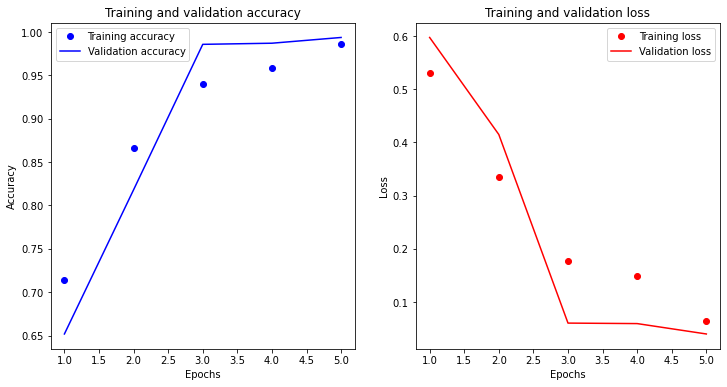

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Plot Performance Metrics Over Time
def plot_performance(history):
    # Extract accuracy and loss
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    # Plot accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_performance(history)


#### Training and validation accuracy

Looking at the 1st epoch, the training and validation accuracy started off on a quite a high number indicatiing hte the model is learning well and at the second epoch, the validation accuracy dropped suggesting overfitting may have occurred in the the second epoch and on the 3rd to 5th epochs, the accuracy recovered which means that the model has learned after the drop and generalized well on the dataset.

#### Training and validation loss

looking at the 1st epoch, the training loss started off low but at the 2nd epoch suddenly skyrocketed corresponding to the low accuracy seen in the trainign accuracy of the 2nd epoch. At the 3rd to 5th epoch, training loss reovered and dropped to a much lower number improving its predictions and lowering the chances of errors.

### Confusion Matrix

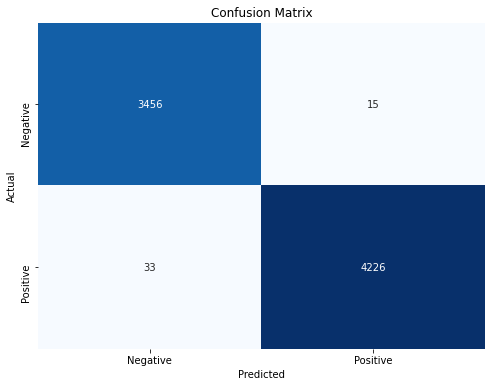

In [22]:

# Generate and Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

Looking at the heatmap above, the model has performed decently with it correctly predicting 3483 True negatives and 4227 True positives and only performed 2 false positives and 18 false negatives.

## Comparative Analysis

After running the naive bayes model as the baseline model, the k-nearest neighbour model and the lstm model, I will collate the different metrics as seen below to better compare the different values.

In [23]:
# Comparison Table
print("\nComparison Table:")
print(f"{'Model':<15}{'Accuracy':<10}{'Precision':<10}{'Recall':<10}{'F1 Score':<10}")
print(f"{'Naive Bayes':<15}{baseline_accuracy:<10.4f}{baseline_precision:<10.4f}{baseline_recall:<10.4f}{baseline_f1:<10.4f}")
print(f"{'KNN':<15}{knn_accuracy:<10.4f}{knn_precision:<10.4f}{knn_recall:<10.4f}{knn_f1:<10.4f}")
print(f"{'LSTM':<15}{lstm_accuracy:<10.4f}{lstm_precision:<10.4f}{lstm_recall:<10.4f}{lstm_f1:<10.4f}")


Comparison Table:
Model          Accuracy  Precision Recall    F1 Score  
Naive Bayes    0.9322    0.9383    0.9379    0.9381    
KNN            0.7417    0.8970    0.5966    0.7166    
LSTM           0.9938    0.9965    0.9923    0.9944    


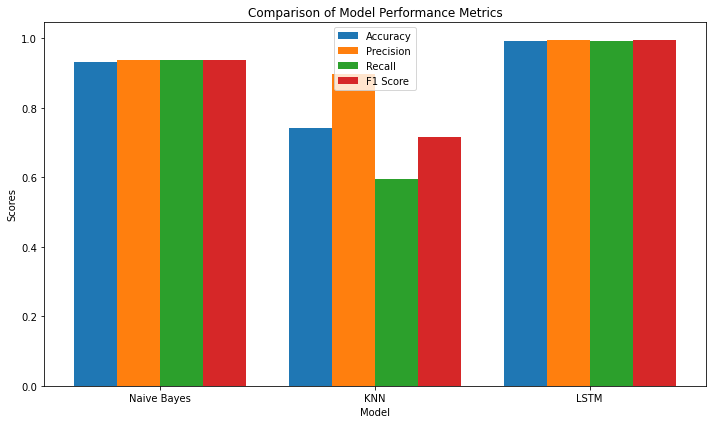

In [24]:
import matplotlib.pyplot as plt


# Define model names and their respective metrics
models = ['Naive Bayes', 'KNN', 'LSTM']
accuracies = [baseline_accuracy, knn_accuracy, lstm_accuracy]
precisions = [baseline_precision, knn_precision, lstm_precision]
recalls = [baseline_recall, knn_recall, lstm_recall]
f1_scores = [baseline_f1, knn_f1, lstm_f1]

# Set up the bar width and positions
bar_width = 0.2
index = np.arange(len(models))

# Create subplots for each metric
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each metric
bars1 = ax.bar(index, accuracies, bar_width, label='Accuracy')
bars2 = ax.bar(index + bar_width, precisions, bar_width, label='Precision')
bars3 = ax.bar(index + 2 * bar_width, recalls, bar_width, label='Recall')
bars4 = ax.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Metrics')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Performance Analysis
As seen from the above table, we can see that the kNN model is performing way below the baseline model of the naive bayes model as such would not be a suitable with accuracy, recall and f1 score being way below the basline model while the preicision score is about the same as the baseline model. 

Meanwhile, the LSTM model combined with the word2vec embedding model is performing better than that of the baseline model and compared to the Knn Model, it performed about 20% better. 

The advantages of the statistical model which I utilised k-nearest neighbor based on this scenario is that it has a fast training time making it effective for smaller datasets and a quick way to filter out fake news however it has the disadvantage of having less scalability on more complex datasets

However for the advantages of the embedding modelwhich in this scenario is incorporated by using LSTM model with word2vec it is more suitable for complex datasets and is much more superior for text detection than the statistical models. However it has the disadvantage of requiring alot more computational resources and has a much longer training time than that of the statistical model.



### Project Summary

When looking at the different mdoels, each of the models are optimal for different areas in terms of text classification, with the kNN model being more suitable for basic text classification task as its scalability is an issue while the LSTM model with word2vec implementation model is more suitable for highly complex datasets and is efficient in the fake news detection area. 

The project can be used as a model benchmark and highlight the differences between the models in terms of fake news detection and help researchers make a more informed decision on which models to used in deveeloping a more advanced fake news detection model.

### Improvements

Some improvements that can be made are the optimization of both the statistical k-NN model and the LSTM model to achieve a more optimized result and comparison and a more in-depth and powerful model could built instead of being restricted by my machine resources to achieve a better training result.

## References


[1] Fridman, O., & Kenner, D. (2021). Media, Politics, and War: How Fake News Shaped the Ukraine Crisis. Journal of Political Studies, 29(1), 65-80.

[2] Daraghmi, Y. A., & Yuan, S. M. (2020). Propaganda, Fake News, and Hate Speech: The Real Threats to Israel-Palestine Peace Process. International Journal of Conflict Management, 31(3), 345-360.